# Domain plotting

In [13]:
import sys
import os
import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
sys.path.append('/g/data/qz03/wp3/code/git-repo')
from utils import *

In [11]:
barra_topo = xr.open_dataset(f'{barraR2_dir}fx/orog/v20231001/orog_AUS-11_ERA5_historical_hres_BOM_BARRA-R2_v1.nc').sel(lat=slice(domain_dict['indonesia']['lat_min'], domain_dict['indonesia']['lat_max']), lon=slice(domain_dict['indonesia']['lon_min'], domain_dict['indonesia']['lon_max']))

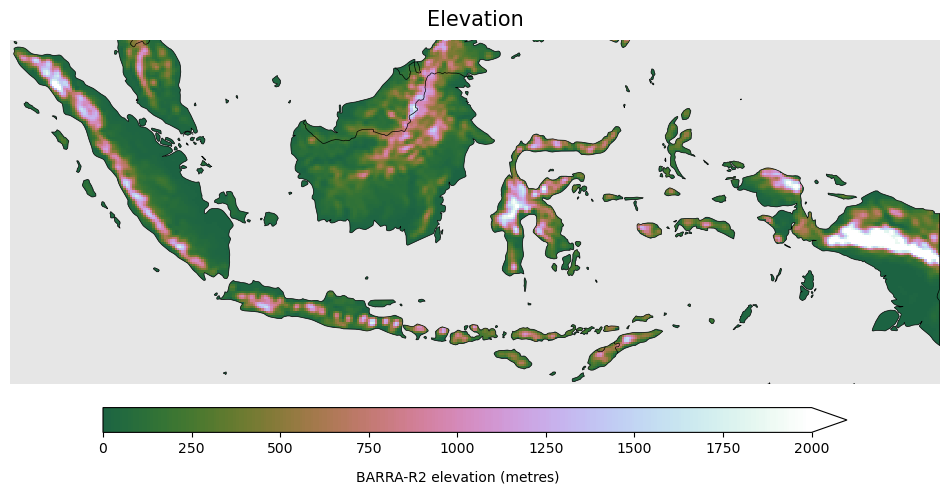

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
contour = barra_topo.orog.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), vmax=2000, cmap=mcolors.LinearSegmentedColormap.from_list('trunc', plt.get_cmap('cubehelix')(np.linspace(5/17, 1, 256))), add_colorbar=False)
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', extend='max', shrink=0.8, aspect=30, pad=0.05)
cbar.set_label('BARRA-R2 elevation (metres)', labelpad=10)
ax.set_title("Elevation", size=15, pad=10)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black', zorder=10, alpha=1)
ax.add_feature(cfeature.LAND, linewidth=0.5, edgecolor='black', facecolor='none', zorder=10, alpha=1)
ax.add_feature(cfeature.OCEAN, zorder=0, facecolor='#e6e6e6', alpha=1)
ax.set_frame_on(False)

# ax.legend(ncol=2, bbox_to_anchor=(0.81, -0.3))
plt.show()
plt.clf()

In [14]:
gdf = gpd.read_file(("/g/data/qz03/wp3/data/shapefiles/Climate-zone-SHP/ZOM9120_INDONESIA.shp"))

In [15]:
gdf

,NOZOM_NAS,KDPROV,NOZONA_LAM,NOZOM_PROV,PROV,PULAU,TIPE_MUSIM,TIPE_ZOM,TIPE_UMUM,geometry
0,3.0,1.0,ACEH_3,ACEH_03,ACEH,SUMATERA,TIPE 2-MUSIM,EKUATORIAL-2,EKUATORIAL,"MULTIPOLYGON Z (((95.23114 5.43438 0, 95.23114..."
1,4.0,1.0,ACEH_4,ACEH_04,ACEH,SUMATERA,TIPE 4-MUSIM,EKUATORIAL-4,EKUATORIAL,"MULTIPOLYGON Z (((95.20726 5.27931 0, 95.20739..."
2,5.0,1.0,ACEH_5,ACEH_05,ACEH,SUMATERA,TIPE 4-MUSIM,EKUATORIAL-4,EKUATORIAL,"POLYGON Z ((96.76989 5.25589 0, 96.79349 5.215..."
3,6.0,1.0,ACEH_6,ACEH_06,ACEH,SUMATERA,TIPE 4-MUSIM,EKUATORIAL-4,EKUATORIAL,"POLYGON Z ((97.59784 5.14018 0, 97.59156 5.126..."
4,16.0,1.0,ACEH_16,ACEH_16,ACEH,SUMATERA,TIPE 2-MUSIM,EKUATORIAL-2,EKUATORIAL,"POLYGON Z ((96.77558 5.0274 0, 96.7956 5.0209 ..."
...,...,...,...,...,...,...,...,...,...,...
694,687.0,34.0,PAPSEL_1,PAPSEL_01,PAPSEL,PAPUA,TIPE 1-MUSIM,MONSUNAL-1,MONSUNAL,"MULTIPOLYGON Z (((135.2055 -4.46143 0, 135.205..."
695,696.0,34.0,PAPSEL_10,PAPSEL_10,PAPSEL,PAPUA,TIPE 2-MUSIM,MONSUNAL-2,MONSUNAL,"MULTIPOLYGON Z (((138.80335 -6.83173 0, 138.80..."
696,698.0,34.0,PAPSEL_12,PAPSEL_12,PAPSEL,PAPUA,TIPE 2-MUSIM,MONSUNAL-2,MONSUNAL,"MULTIPOLYGON Z (((138.9432 -7.88218 0, 138.943..."
697,697.0,34.0,PAPSEL_11,PAPSEL_11,PAPSEL,PAPUA,TIPE 2-MUSIM,MONSUNAL-2,MONSUNAL,"MULTIPOLYGON Z (((138.95965 -8.3702 0, 138.958..."


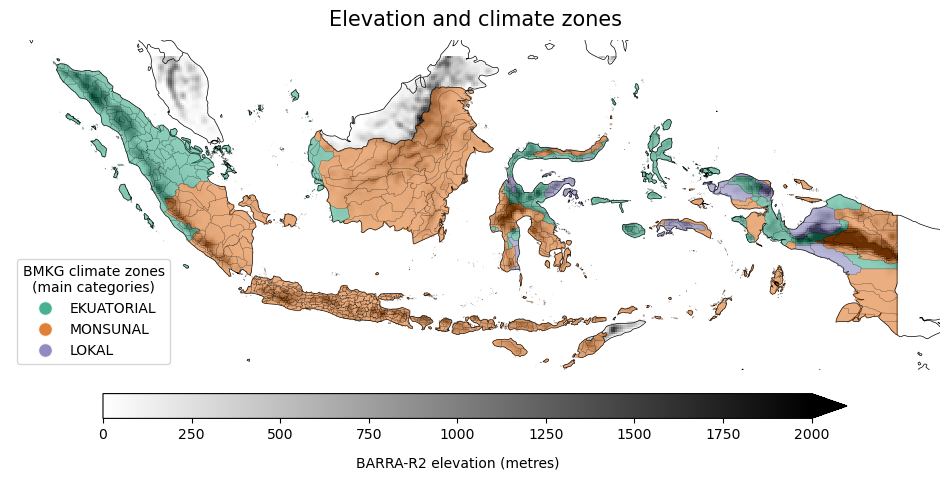

<Figure size 640x480 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

contour = barra_topo.orog.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), vmax=2000, cmap='binary', add_colorbar=False)
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', extend='max', shrink=0.8, aspect=30, pad=0.05)
cbar.set_label('BARRA-R2 elevation (metres)', labelpad=10)

ax.set_title("Elevation and climate zones", size=15, pad=10)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black', zorder=10, alpha=1)
ax.add_feature(cfeature.LAND, linewidth=0.5, edgecolor='black', facecolor='none', zorder=10, alpha=1)
ax.set_frame_on(False)


unique_types = gdf['TIPE_UMUM'].unique()
cmap = plt.get_cmap('Dark2') 
colors = dict(zip(unique_types, cmap.colors[:len(unique_types)]))

for item, color in colors.items():
    gdf[gdf['TIPE_UMUM'] == item].plot(ax=ax, facecolor=color, edgecolor='black', linewidth=0.2, alpha=0.5, transform=ccrs.PlateCarree(), zorder=20)

legend_elements = [Line2D([0], [0], marker='o', color='w', label=item, markerfacecolor=color, markersize=10, alpha=0.8) for item, color in colors.items()]
legend = ax.legend(handles=legend_elements, title='BMKG climate zones\n(main categories)', loc='lower left', fontsize=10) #bbox_to_anchor=(0.7, -0.3))
legend.get_title().set_ha('center')
plt.show()
plt.clf()


In [20]:
gdf = gpd.read_file("/g/data/qz03/wp3/data/shapefiles/Watershed-BIG/DAS/KLASIFIKASI DAS.gdb")

In [21]:
gdf

,KODE_DAS,NAMA_DAS,LUAS_HA,KLSFKS,BPDASHL,SHAPE_Length,SHAPE_Area,KETERANGAN,geometry
0,2340001,BEH,154994.772957,DIPULIHKAN,DODOKAN MOYOSARI,1.883170,1.244163e-01,None,"MULTIPOLYGON (((117.24888 -8.62687, 117.24889 ..."
1,2340002,REA,85014.859004,DIPERTAHANKAN,DODOKAN MOYOSARI,1.462000,6.825937e-02,None,"MULTIPOLYGON (((116.91638 -8.56687, 116.91633 ..."
2,2340003,MOYO,81254.671205,DIPERTAHANKAN,DODOKAN MOYOSARI,1.513996,6.525156e-02,None,"MULTIPOLYGON (((117.52759 -8.41236, 117.5276 -..."
3,2340004,DODOKAN,57974.778184,DIPERTAHANKAN,DODOKAN MOYOSARI,1.271908,4.654680e-02,None,"MULTIPOLYGON (((116.28293 -8.84885, 116.28293 ..."
4,2340005,PALAPARADO,48005.261052,DIPERTAHANKAN,DODOKAN MOYOSARI,1.196141,3.855128e-02,None,"MULTIPOLYGON (((118.81863 -8.62854, 118.81862 ..."
...,...,...,...,...,...,...,...,...,...
42939,2951124,MAREK 2,0.786809,DIPERTAHANKAN,JENEBERANG SADDANG,0.004696,6.369929e-07,None,"MULTIPOLYGON (((120.39837 -4.74222, 120.3984 -..."
42940,2951125,PULAU PALETTE 2,0.609484,DIPERTAHANKAN,JENEBERANG SADDANG,0.003766,4.936300e-07,None,"MULTIPOLYGON (((120.37529 -4.46093, 120.37527 ..."
42941,2951126,PULAU PALETTE 1,0.102438,DIPERTAHANKAN,JENEBERANG SADDANG,0.001131,8.296569e-08,None,"MULTIPOLYGON (((120.37611 -4.46099, 120.37611 ..."
42942,2951127,Larera 1,0.139849,DIPERTAHANKAN,JENEBERANG SADDANG,0.001469,1.131660e-07,None,"MULTIPOLYGON (((120.39999 -5.06272, 120.39992 ..."


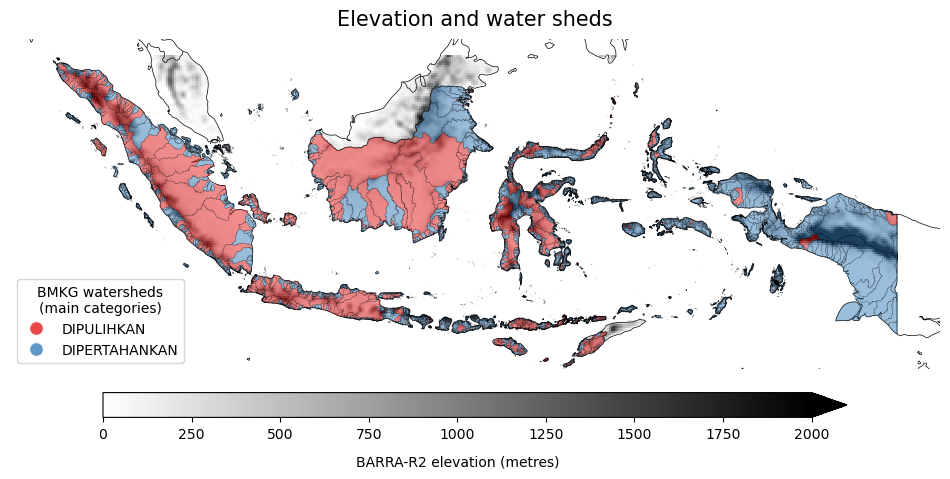

<Figure size 640x480 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})


contour = barra_topo.orog.plot.imshow(ax=ax, transform=ccrs.PlateCarree(), vmax=2000, cmap='binary', add_colorbar=False)
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', extend='max', shrink=0.8, aspect=30, pad=0.05)
cbar.set_label('BARRA-R2 elevation (metres)', labelpad=10)


ax.set_title("Elevation and water sheds", size=15, pad=10)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black', zorder=10, alpha=1)
ax.add_feature(cfeature.LAND, linewidth=0.5, edgecolor='black', facecolor='none', zorder=10, alpha=1)
ax.set_frame_on(False)


unique_types = gdf['KLSFKS'].unique()
cmap = plt.get_cmap('Set1')  
colors = dict(zip(unique_types, cmap.colors[:len(unique_types)]))

for item, color in colors.items():
    gdf[gdf['KLSFKS'] == item].plot(ax=ax, facecolor=color, edgecolor='black', linewidth=0.2, alpha=0.5, transform=ccrs.PlateCarree(), zorder=20)


legend_elements = [Line2D([0], [0], marker='o', color='w', label=item, markerfacecolor=color, markersize=10, alpha=0.8) for item, color in colors.items()]
legend = ax.legend(handles=legend_elements, title='BMKG watersheds\n(main categories)', loc='lower left', fontsize=10) #bbox_to_anchor=(0.7, -0.3))
legend.get_title().set_ha('center')
plt.show()
plt.clf()
